https://archive.ics.uci.edu/dataset/368/facebook+metrics

The data is related to posts' published during the year of 2014 on the Facebook's page of a renowned cosmetics brand.
This dataset contains 500 of the 790 rows and part of the features analyzed by Moro et al. (2016). The remaining were omitted due to confidentiality issues.

Target = Total Interactions

Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/raw_facebook_data.csv', sep=";")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

In [4]:
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


Observations:
* What is Category? 
* Who is paying under Paid? The brand that owns the FB page or someone lese?
* What is Total Interactions? 

Definitions:
* Reach = the total number of unique people who have seen the content
* Impressions = the total number of times a content is displayed 
* Lifetime Post Consumers = the total number of unique people who have clicked on, liked, commented on, or shared a specific post, or clicked on the page profile, during the entire time the post has been live. 
* Lifetime Post Consumptions = the total volume of those clicks, which may be higher than the number of consumers because one person can click multiple times. 
* Total Interactions: The sum of all user engagements with a post or page within a specific timeframe, including likes, comments, shares, and reactions.
* Category = manual content charaterization: 1 action (special offers and contests), 2 product (direct advertisement, explicit branded content), and 3 inspiration (non-explicit brand-related content); editial label (CTA, promoting a specific product, non-explict)


In [5]:
df.shape

(500, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

The only non-integer or float value is Type. This needs to be converted into a numerical value that the model can work with.

ValueError: could not convert string to float: 'Photo'

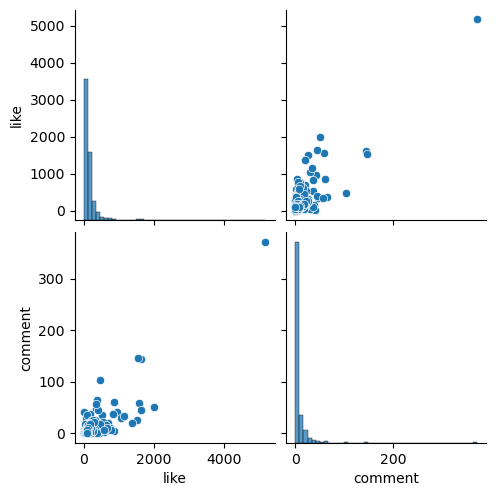

In [22]:
sns.pairplot(df[['like', 'comment']])
corr = df.corr()
corr
#plt.figure(figsize=(8,16))
#sns.heatmap(corr,annot=True, cmap='coolwarm')

In [11]:
df["Type"].value_counts()

Type
Photo     426
Status     45
Link       22
Video       7
Name: count, dtype: int64

There are four categorical values in Types column: Photo, Status, Link, and Video. Using pd.get_dummies, we can convert that into binary values that can work better with the model.

In [7]:
df["Category"].value_counts()

Category
1    215
3    155
2    130
Name: count, dtype: int64

In [8]:
df.isna().sum()

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

Has minimum number of NA values: 1 in Paid, 1 in like, and 4 in share. Compared to 500 rows, these are very small numbers so we can just drop them.

In [12]:
df.describe()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,499.000000,496.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278557,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.945892,27.266129,212.120000
std,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448739,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.398742,42.613292,380.233118
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.500000,10.000000,71.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.500000,32.250000,228.500000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


Observations:
* Why is the lowest value for Post Hour 1? It should be 0 according to the source dictionary.


In [14]:
df["Post Hour"].value_counts()

Post Hour
3     105
10     78
13     52
11     44
2      39
4      35
9      30
12     29
6      16
7      13
5      13
14     13
8      12
15      6
1       4
18      3
17      3
23      1
22      1
20      1
19      1
16      1
Name: count, dtype: int64

In [17]:
df['Post Hour'].value_counts().sort_index()

Post Hour
1       4
2      39
3     105
4      35
5      13
6      16
7      13
8      12
9      30
10     78
11     44
12     29
13     52
14     13
15      6
16      1
17      3
18      3
19      1
20      1
22      1
23      1
Name: count, dtype: int64

This appears to be a data quality issue since Post Hour 0 is missing!